# 3월 RF 분석

In [1]:
import pandas as pd
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
raw_hourly_df['month'] = pd.DatetimeIndex(raw_hourly_df['date']).month_name()
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm,month
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October


In [3]:
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "January"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "February"]
raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "March"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "April"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "May"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "June"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "July"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "August"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "September"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "October"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "November"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "December"]

## 1. 4001430 Station Random Forest 분석

In [4]:
st_code = "4001430"
x_col = st_code + "_gpm"
y_col = st_code

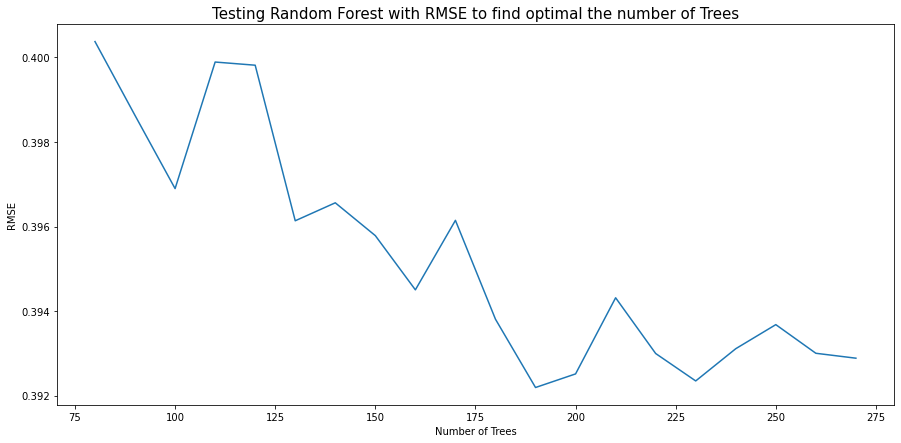

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_scores = []
estimators = []
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

rf = RandomForestRegressor(warm_start=True, random_state=2, n_jobs=-1)

est = 80

for i in range(20):
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    rmse_scores.append(rmse)
    estimators.append(est)
    
    est += 10
    
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)

plt.xlabel("Number of Trees")
plt.ylabel("RMSE")

plt.title("Testing Random Forest with RMSE to find optimal the number of Trees", fontsize="15")
plt.show()

### Case-1 적용 RF

In [6]:
est_jan=190
cv_num = 20

rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X = raw_hourly_df[[x_col]]
y = raw_hourly_df[y_col]

In [7]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-3.24880642e-02, -1.73524905e-01, -3.14273646e-04, -7.96314872e-01,
       -1.73589930e-02, -4.07425898e-02, -1.95340815e-02, -9.75499133e-02,
       -5.76961607e-01, -2.48650477e-01, -2.12449554e-01, -2.23543855e-03,
       -8.08558396e-02, -4.98631340e-02, -5.94429863e-02, -4.38560039e-02,
       -2.98691319e-01, -3.78619575e-01, -2.17916944e-01, -1.45654322e-01])

In [8]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.18  0.417 0.018 0.892 0.132 0.202 0.14  0.312 0.76  0.499 0.461 0.047
 0.284 0.223 0.244 0.209 0.547 0.615 0.467 0.382]
RMSE 평균: 0.352


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

def density_scatter(x , y, st, bins=20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    ax.set_title('Ground Rainfall Prediction \n using IMERG in the Station: %i' %st , fontsize=18)
    ax.set_xlabel('Prediction (mm/h)', fontsize=18)
    ax.set_ylabel('Station Observation (mm/h)', fontsize=18)
    xt = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 15])
    ax.set_xticklabels(xt, fontsize=18)
    ax.set_yticklabels(xt, fontsize=18)

    x_pred = np.linspace(0, 20, 2)            
    x_pred = x_pred.reshape(-1, 1)  
    y_pred = model.predict(x_pred)

    ax.plot(x_pred, y_pred, color='k')
    ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


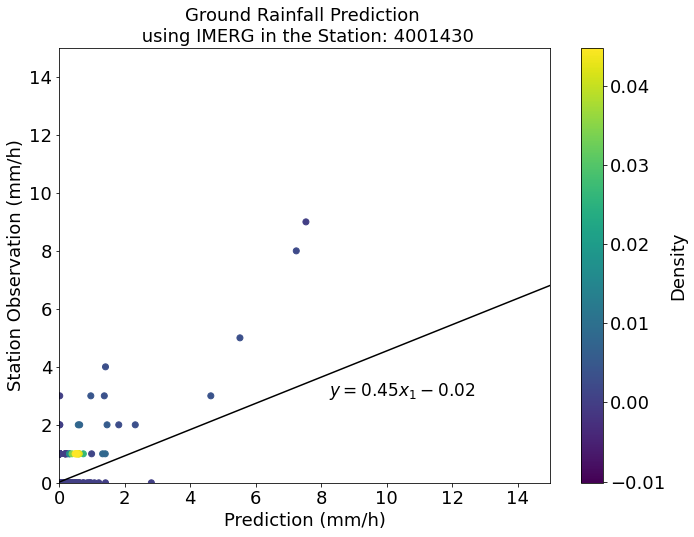

In [10]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [11]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.26929018, -0.95570134, -1.89868505, -1.12205677, -1.56960275,
       -1.33821364, -1.73759013, -2.06320878, -0.73539327, -3.65716242,
       -0.13157381, -6.84859447, -8.98427385, -2.00732513, -0.13670514,
       -2.68303113, -2.88807953, -0.68747091, -3.94286521, -0.63132463])

In [12]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.506 0.978 1.378 1.059 1.253 1.157 1.318 1.436 0.858 1.912 0.363 2.617
 2.997 1.417 0.37  1.638 1.699 0.829 1.986 0.795]
RMSE 평균: 1.378
제거된 0의 비율: 95.699


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


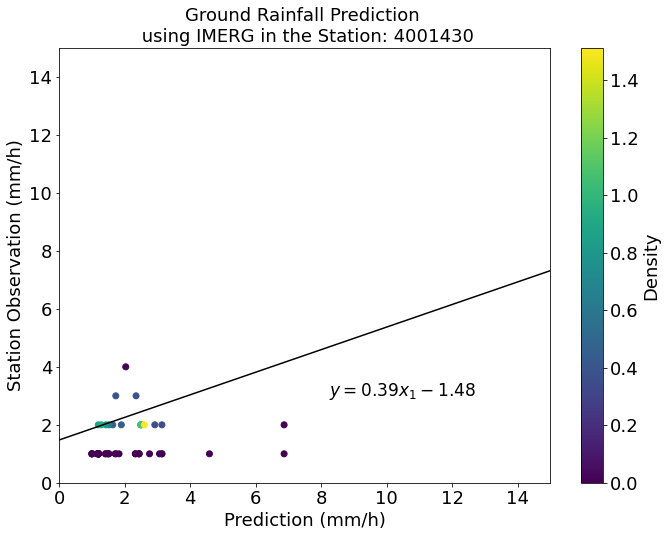

In [13]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [14]:
rmse_case1_all = []
rmse_case2_all = []
zero_count_ratio = []
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 2. 4001440 Station Random Forest 분석

### Case-1 적용 RF

In [15]:
st_code = "4001440"
x_col = st_code + "_gpm"
y_col = st_code

In [16]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.15764341, -0.47229544, -0.10693548, -0.11062683, -0.05577576,
       -0.09896671, -0.20181059, -0.47847655, -0.11710194, -0.34160083,
       -0.06288258, -0.10880195, -0.12793777, -0.15565147, -0.37758522,
       -0.08076854, -0.16667539, -0.10041893, -0.11761305, -0.89671835])

In [17]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.397 0.687 0.327 0.333 0.236 0.315 0.449 0.692 0.342 0.584 0.251 0.33
 0.358 0.395 0.614 0.284 0.408 0.317 0.343 0.947]
RMSE 평균: 0.430


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


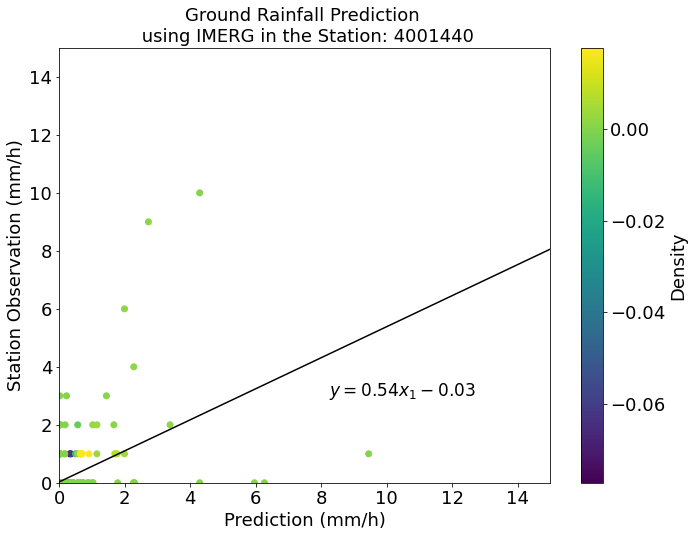

In [18]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [19]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -1.30380684,  -5.53663857,  -0.20649576, -11.84308291,
        -2.24329672,  -4.27875083,  -0.72938676,  -0.18942965,
        -2.02383943,  -0.55127897,  -1.96930944,  -2.92783077,
        -3.21925566,  -0.53569903,  -1.33257766,  -4.17063564,
       -12.46068892,  -3.8192066 ,  -1.02995896,  -1.06062607])

In [20]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.142 2.353 0.454 3.441 1.498 2.069 0.854 0.435 1.423 0.742 1.403 1.711
 1.794 0.732 1.154 2.042 3.53  1.954 1.015 1.03 ]
RMSE 평균: 1.539
제거된 0의 비율: 95.430


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


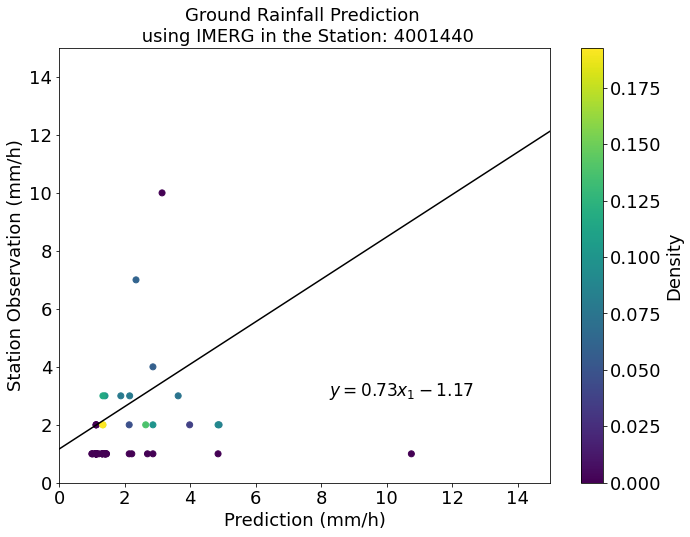

In [21]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [22]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 3. 4001450 Station Random Forest 분석

### Case-1 적용 RF

In [23]:
st_code = "4001450"
x_col = st_code + "_gpm"
y_col = st_code

In [24]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.21616474, -0.28508959, -0.25983046, -0.16101183, -0.19903504,
       -0.2623114 , -0.105015  , -0.19218049, -0.158584  , -0.30412306,
       -0.18781358, -0.03393402, -0.31698378, -0.25673399, -2.61629021,
       -0.14344267, -0.08395943, -0.11359142, -1.11169911, -0.07507426])

In [25]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.465 0.534 0.51  0.401 0.446 0.512 0.324 0.438 0.398 0.551 0.433 0.184
 0.563 0.507 1.617 0.379 0.29  0.337 1.054 0.274]
RMSE 평균: 0.511


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


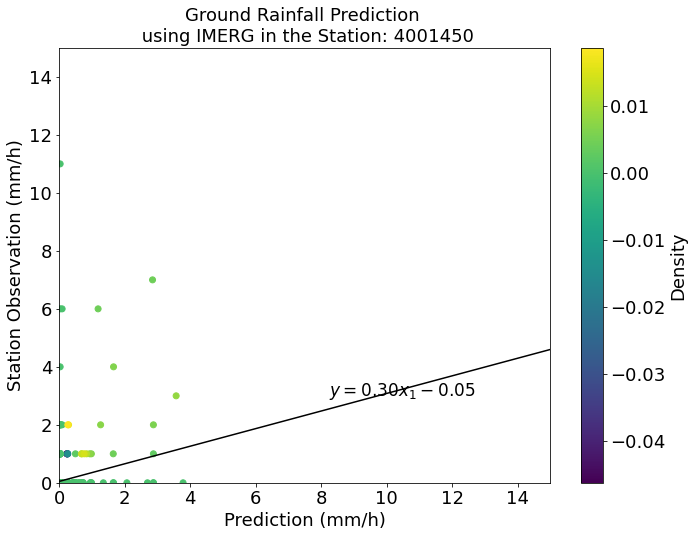

In [26]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [27]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -0.92484298,  -2.33914983,  -0.44054529,  -1.37678202,
        -1.53283161,  -2.82705466, -24.67446792, -11.79756589,
        -2.3970917 , -13.66100683,  -0.67155943,  -3.74872026,
        -2.23738591,  -1.80331421,  -0.36256278,  -0.52056311,
       -38.08363146,  -4.51850621,  -1.93184739,  -0.9841548 ])

In [28]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.962 1.529 0.664 1.173 1.238 1.681 4.967 3.435 1.548 3.696 0.819 1.936
 1.496 1.343 0.602 0.722 6.171 2.126 1.39  0.992]
RMSE 평균: 1.925
제거된 0의 비율: 95.488


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


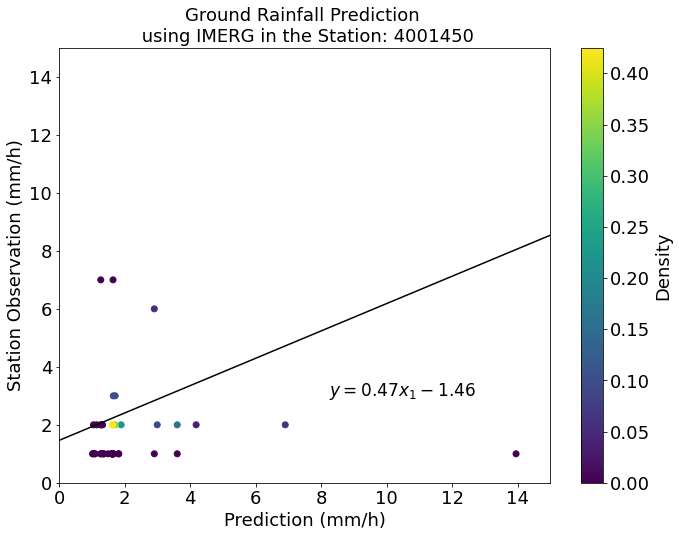

In [29]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [30]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 4. 4003420 Station Random Forest 분석

### Case-1 적용 RF

In [31]:
st_code = "4003420"
x_col = st_code + "_gpm"
y_col = st_code

In [32]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.1541592 , -0.23678339, -0.16795786, -0.13857063, -0.04061278,
       -0.13776848, -0.17041425, -0.13890036, -0.04785253, -0.2908297 ,
       -0.10368559, -0.09984301, -0.14126779, -0.2212417 , -0.42296256,
       -0.0378666 , -0.05384908, -0.06044389, -0.26249228, -0.26485733])

In [33]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.393 0.487 0.41  0.372 0.202 0.371 0.413 0.373 0.219 0.539 0.322 0.316
 0.376 0.47  0.65  0.195 0.232 0.246 0.512 0.515]
RMSE 평균: 0.381


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


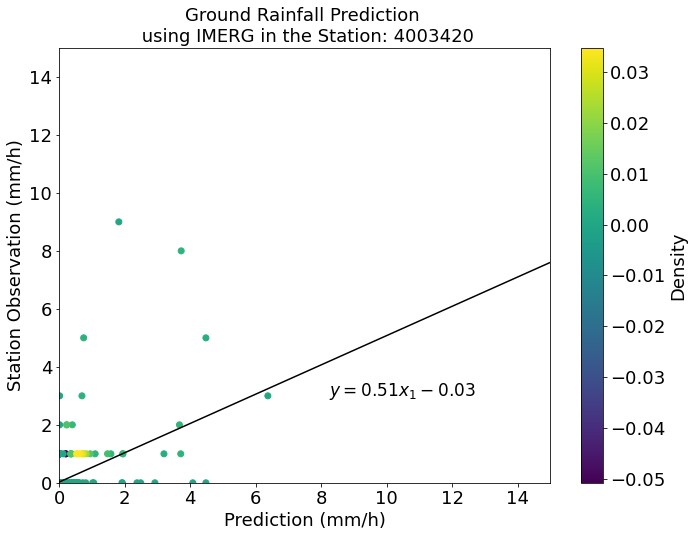

In [34]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [35]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.7944348 , -0.70664974, -0.12539468, -2.38183624, -0.18521712,
       -0.7741512 , -1.4535939 , -8.57322727, -2.45768442, -0.11730336,
       -0.25599513, -0.66112156, -5.77464005, -1.54881327, -0.76574495,
       -0.21968515, -5.25017035, -1.18160358, -0.4175038 , -4.32370674])

In [36]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.891 0.841 0.354 1.543 0.43  0.88  1.206 2.928 1.568 0.342 0.506 0.813
 2.403 1.245 0.875 0.469 2.291 1.087 0.646 2.079]
RMSE 평균: 1.170
제거된 0의 비율: 95.718


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


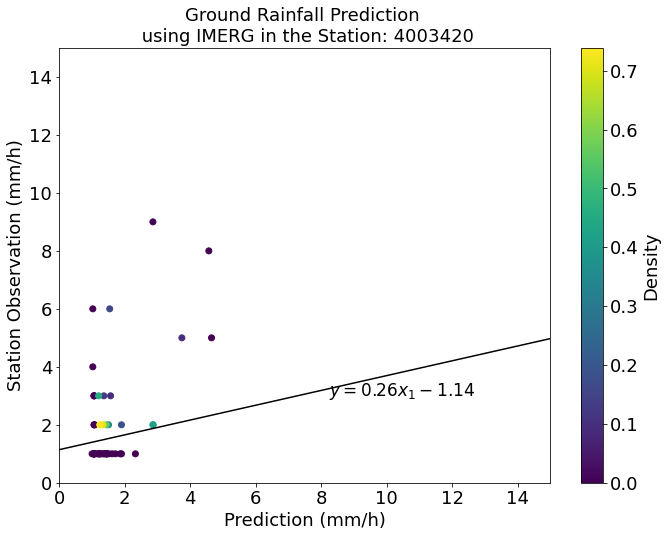

In [37]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [38]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 5. 4007450 Station Random Forest 분석

### Case-1 적용 RF

In [39]:
st_code = "4007450"
x_col = st_code + "_gpm"
y_col = st_code

In [40]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.37378859, -0.91195749, -0.75608629, -0.33082835, -0.22456401,
       -0.21554012, -0.27903038, -0.15878432, -0.33546025, -0.46374412,
       -0.23161628, -0.68078887, -0.34968609, -0.82375544, -1.39640957,
       -0.16970392, -0.23999986, -0.25471731, -0.19456507, -0.42399902])

In [41]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.611 0.955 0.87  0.575 0.474 0.464 0.528 0.398 0.579 0.681 0.481 0.825
 0.591 0.908 1.182 0.412 0.49  0.505 0.441 0.651]
RMSE 평균: 0.631


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


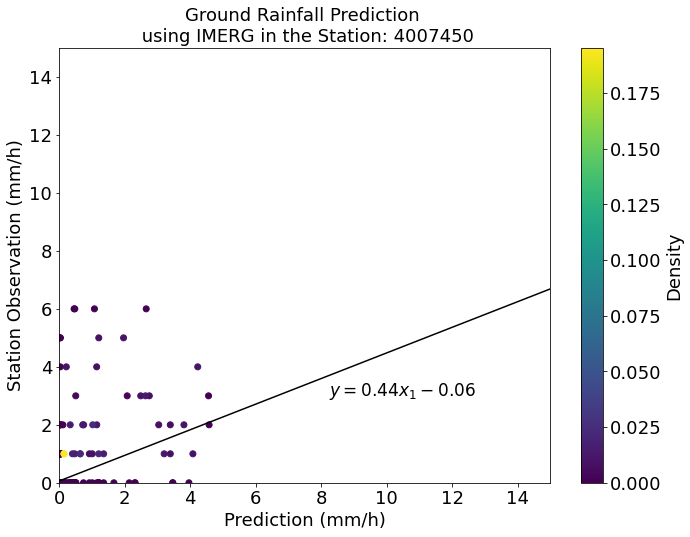

In [42]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [43]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -6.84846205,  -1.84210721,  -6.7602601 ,  -7.16677302,
        -0.97335302,  -1.44405576,  -3.41287492,  -1.87583706,
       -18.93500062,  -2.5445218 ,  -3.26235443,  -1.5645374 ,
        -1.81058857,  -5.43025924,  -1.17272703,  -0.93518618,
        -8.7359321 ,  -6.73271954, -14.90882314,  -3.81065771])

In [44]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.617 1.357 2.6   2.677 0.987 1.202 1.847 1.37  4.351 1.595 1.806 1.251
 1.346 2.33  1.083 0.967 2.956 2.595 3.861 1.952]
RMSE 평균: 2.037
제거된 0의 비율: 94.835


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


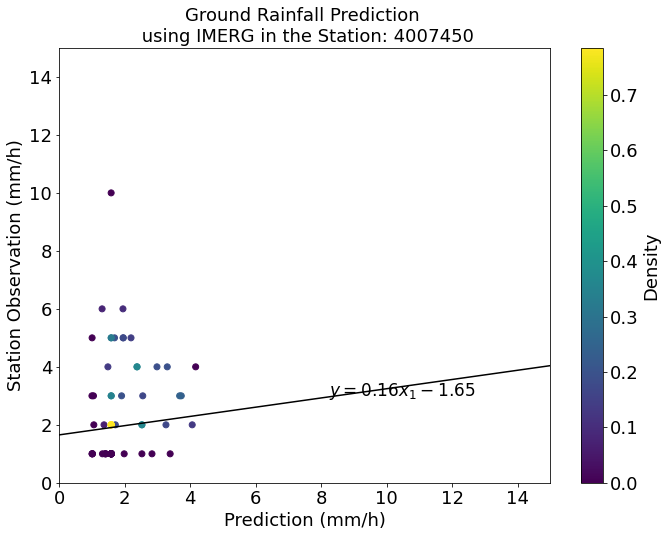

In [45]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [46]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 6. 4007470 Station Random Forest 분석

### Case-1 적용 RF

In [47]:
st_code = "4007470"
x_col = st_code + "_gpm"
y_col = st_code

In [48]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.4105079 , -0.30796643, -0.22753617, -0.23219318, -0.28613191,
       -0.3140094 , -0.23558252, -0.27494499, -0.16260247, -0.3375802 ,
       -0.18537706, -0.29439956, -0.77182144, -0.73391818, -0.90869108,
       -0.17008196, -0.2536823 , -0.23679515, -0.07398072, -0.26615286])

In [49]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.641 0.555 0.477 0.482 0.535 0.56  0.485 0.524 0.403 0.581 0.431 0.543
 0.879 0.857 0.953 0.412 0.504 0.487 0.272 0.516]
RMSE 평균: 0.555


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


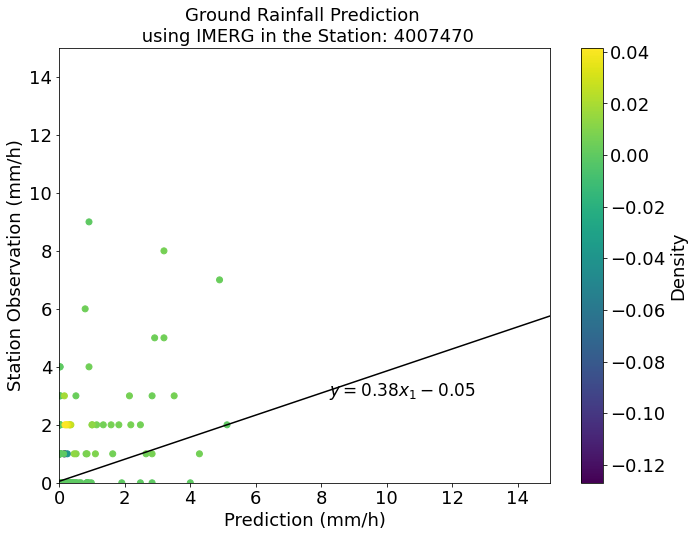

In [50]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [51]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -4.4948543 ,  -2.11188902,  -5.16569507,  -2.65103622,
        -4.96932953,  -3.60540614,  -0.98647414,  -1.09351702,
        -8.67824435,  -0.75025451,  -2.39161938,  -6.049789  ,
        -0.91643019,  -7.63379712,  -1.28320172,  -3.94107112,
       -10.35136926,  -1.74500176,  -8.55839516,  -0.28990502])

In [52]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.12  1.453 2.273 1.628 2.229 1.899 0.993 1.046 2.946 0.866 1.546 2.46
 0.957 2.763 1.133 1.985 3.217 1.321 2.925 0.538]
RMSE 평균: 1.815
제거된 0의 비율: 94.931


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


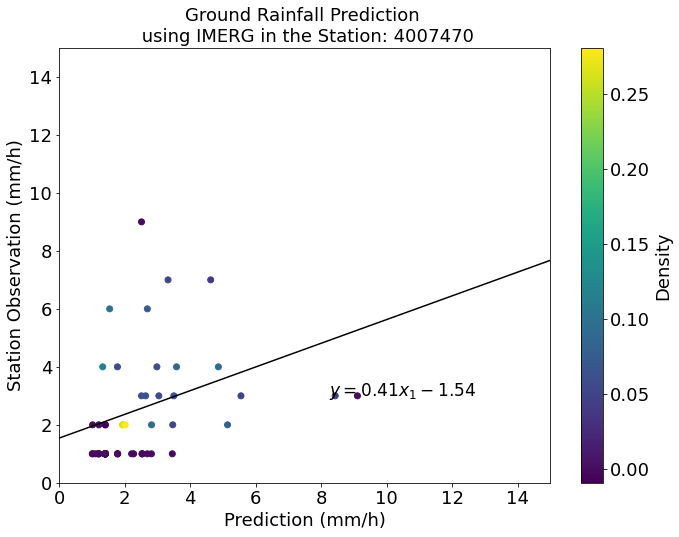

In [53]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [54]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 7. 4007472 Station Random Forest 분석

### Case-1 적용 RF

In [55]:
st_code = "4007472"
x_col = st_code + "_gpm"
y_col = st_code

In [56]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.12268271, -0.30860201, -0.34393051, -0.16084069, -0.43610328,
       -0.21943866, -0.16145873, -0.23948925, -0.0733627 , -0.47557499,
       -0.15387211, -0.16348109, -0.39231764, -0.42171788, -0.77618237,
       -0.1600229 , -0.22983641, -0.11229464, -0.23827913, -0.23930319])

In [57]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.35  0.556 0.586 0.401 0.66  0.468 0.402 0.489 0.271 0.69  0.392 0.404
 0.626 0.649 0.881 0.4   0.479 0.335 0.488 0.489]
RMSE 평균: 0.501


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


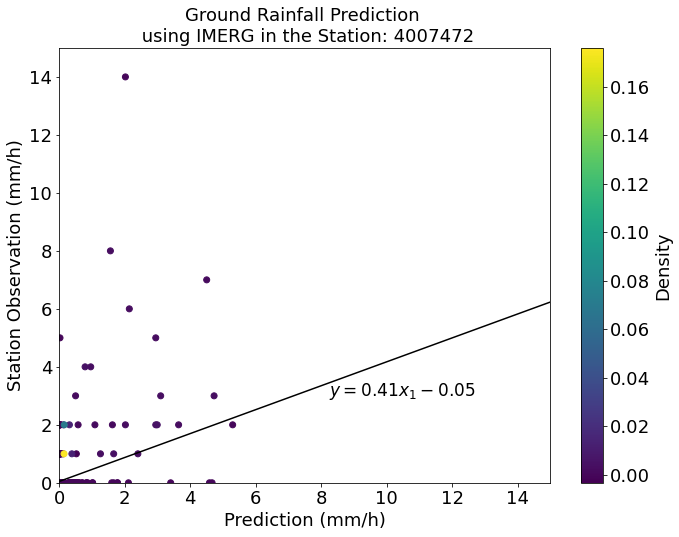

In [58]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [59]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.90617581,  -3.75811204,  -3.11126799,  -6.03136458,
        -4.45870262,  -2.63135871,  -1.42286121,  -2.63674948,
        -7.52896932,  -0.87641322,  -2.11374394,  -0.2838457 ,
        -2.03472935,  -0.57556543,  -1.22200277,  -4.65665707,
        -2.11151854, -14.21364069,  -1.12923615,  -1.20453802])

In [60]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.976 1.939 1.764 2.456 2.112 1.622 1.193 1.624 2.744 0.936 1.454 0.533
 1.426 0.759 1.105 2.158 1.453 3.77  1.063 1.098]
RMSE 평균: 1.659
제거된 0의 비율: 94.988


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


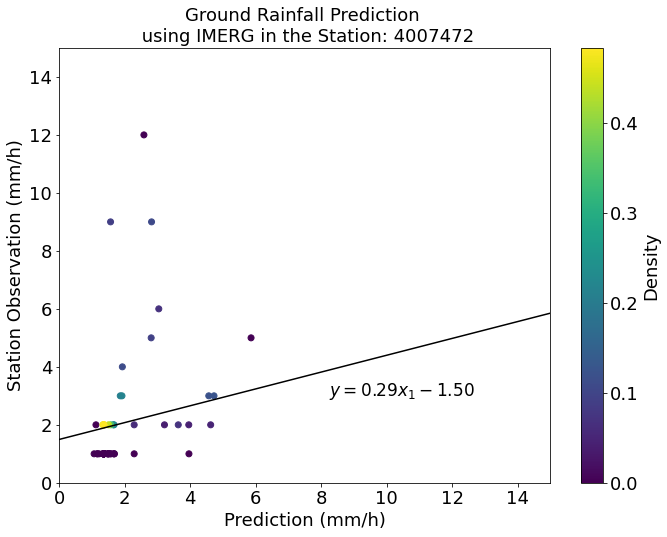

In [61]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [62]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 8. 4007474 Station Random Forest 분석

### Case-1 적용 RF

In [63]:
st_code = "4007474"
x_col = st_code + "_gpm"
y_col = st_code

In [64]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.24917861, -0.10452137, -0.1635657 , -0.13661673, -0.17108341,
       -0.07791365, -0.27898595, -0.14786962, -0.16138066, -0.10175522,
       -0.086938  , -0.13810175, -0.18891837, -0.62753766, -0.29852698,
       -0.15851074, -0.06421013, -0.1887206 , -0.20089438, -0.38766165])

In [65]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.499 0.323 0.404 0.37  0.414 0.279 0.528 0.385 0.402 0.319 0.295 0.372
 0.435 0.792 0.546 0.398 0.253 0.434 0.448 0.623]
RMSE 평균: 0.426


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


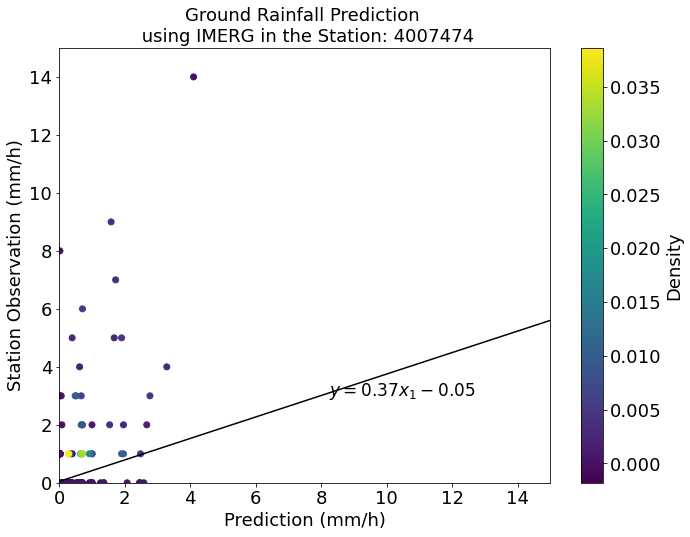

In [66]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [67]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -5.0748095 ,  -2.96707465,  -0.61110418,  -0.53259152,
        -1.58159327,  -2.16440886,  -1.57304135,  -3.33237887,
        -3.90028551,  -2.95306998,  -2.0252307 ,  -0.3885412 ,
        -1.13318307,  -1.97772656,  -1.06257251,  -0.17439427,
        -0.68550641, -11.30099686,  -1.4754676 ,  -5.71482795])

In [68]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.253 1.723 0.782 0.73  1.258 1.471 1.254 1.825 1.975 1.718 1.423 0.623
 1.065 1.406 1.031 0.418 0.828 3.362 1.215 2.391]
RMSE 평균: 1.437
제거된 0의 비율: 95.046


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


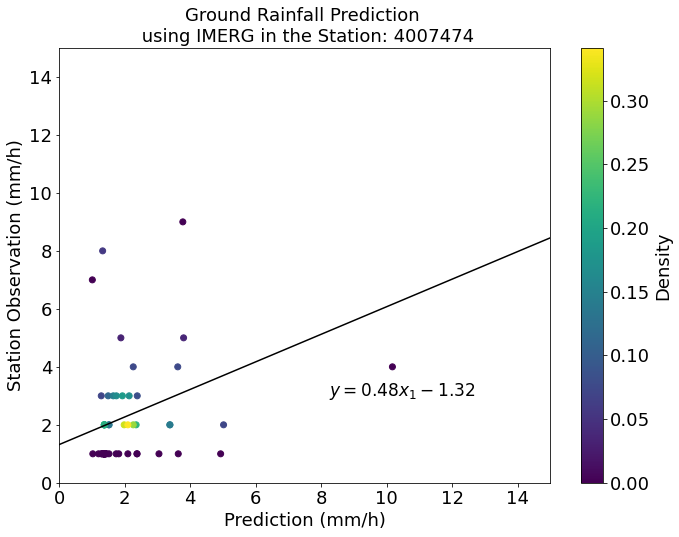

In [69]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [70]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 9. 4009460 Station Random Forest 분석

### Case-1 적용 RF

In [71]:
st_code = "4009460"
x_col = st_code + "_gpm"
y_col = st_code

In [72]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.20206209, -1.50219909, -0.80843612, -0.44804037, -0.39587913,
       -0.20532574, -0.11849279, -0.23590525, -0.18490505, -0.22353938,
       -0.05829651, -0.24931855, -0.22555587, -0.96605714, -1.31529794,
       -0.1802128 , -0.78683787, -0.28388314, -0.39763823, -0.7119946 ])

In [73]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.45  1.226 0.899 0.669 0.629 0.453 0.344 0.486 0.43  0.473 0.241 0.499
 0.475 0.983 1.147 0.425 0.887 0.533 0.631 0.844]
RMSE 평균: 0.636


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


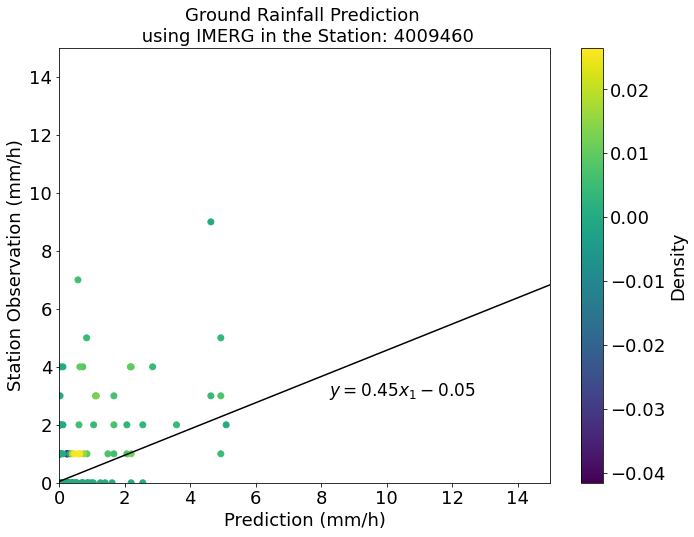

In [74]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [75]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -1.695861  , -10.54375224,  -1.86128038, -26.67935659,
       -12.46124118,  -2.70113568,  -1.74787572,  -9.70228339,
        -4.31491416,  -1.54516978,  -1.37441849,  -2.96558983,
        -1.87866467,  -5.00052881,  -0.29662965,  -2.62459273,
       -12.62048958,  -1.85171697,  -2.20735281,  -3.75652468])

In [76]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.302 3.247 1.364 5.165 3.53  1.644 1.322 3.115 2.077 1.243 1.172 1.722
 1.371 2.236 0.545 1.62  3.553 1.361 1.486 1.938]
RMSE 평균: 2.051
제거된 0의 비율: 94.796


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


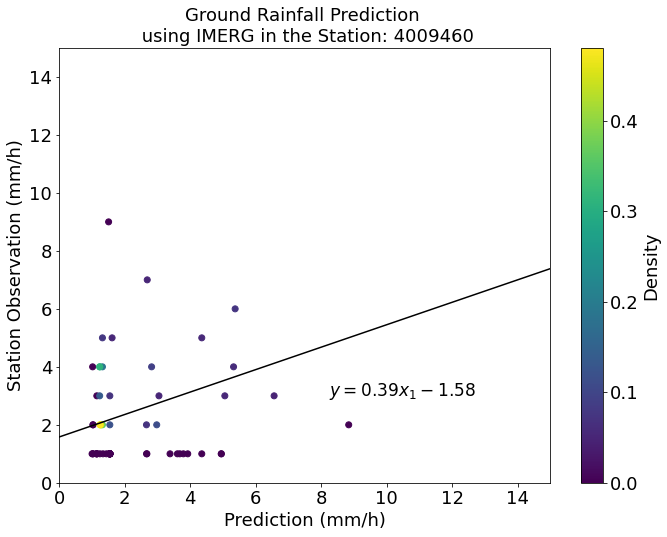

In [77]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [78]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 10. 9000140 Station Random Forest 분석

### Case-1 적용 RF

In [79]:
st_code = "9000140"
x_col = st_code + "_gpm"
y_col = st_code

In [80]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.24567107, -0.16328276, -0.21224584, -0.15919324, -0.19075902,
       -0.31218218, -0.12117795, -0.20048476, -0.21312926, -0.3555074 ,
       -0.07598875, -0.07930947, -0.26281125, -0.35717041, -0.34608592,
       -0.26964938, -0.13102728, -0.11723414, -0.08252153, -0.18639045])

In [81]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.496 0.404 0.461 0.399 0.437 0.559 0.348 0.448 0.462 0.596 0.276 0.282
 0.513 0.598 0.588 0.519 0.362 0.342 0.287 0.432]
RMSE 평균: 0.440


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


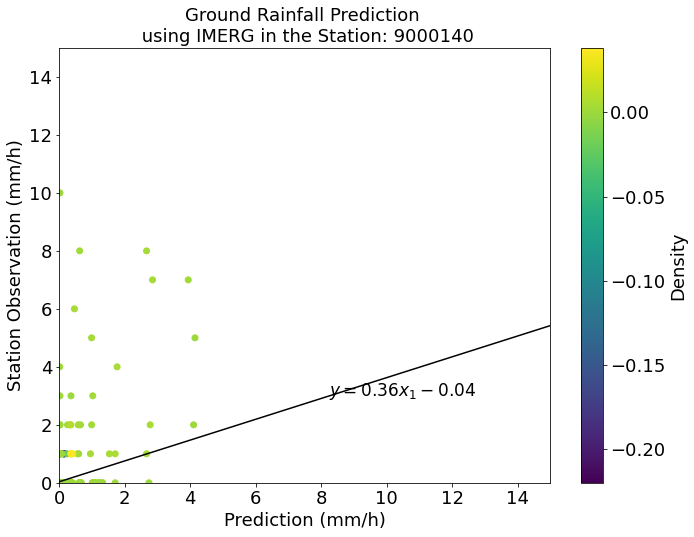

In [82]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [83]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.3314367 , -1.41829322, -2.96634392, -3.33857374, -2.89158677,
       -6.90337734, -1.94691865, -3.80619638, -3.59570603, -0.26120019,
       -1.11452205, -8.7551532 , -2.75610099, -0.56202101, -3.64899351,
       -2.29844015, -0.64171151, -1.87877235, -6.33371402, -4.47389029])

In [84]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.154 1.191 1.722 1.827 1.7   2.627 1.395 1.951 1.896 0.511 1.056 2.959
 1.66  0.75  1.91  1.516 0.801 1.371 2.517 2.115]
RMSE 평균: 1.632
제거된 0의 비율: 95.142


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


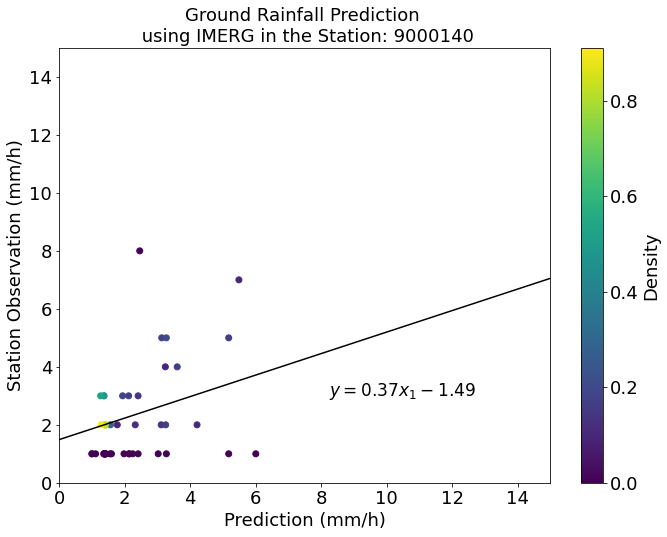

In [85]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [86]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 11. 9000233 Station Random Forest 분석

### Case-1 적용 RF

In [87]:
st_code = "9000233"
x_col = st_code + "_gpm"
y_col = st_code

In [88]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.22384221, -0.11118483, -0.3515146 , -0.27951319, -0.12063115,
       -0.15875553, -0.16345512, -0.24552615, -0.29158512, -0.39176663,
       -0.30920664, -0.29703178, -0.19111063, -0.33313019, -0.74205716,
       -0.24823561, -0.21498361, -0.1714449 , -0.22235232, -0.46741525])

In [89]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.473 0.333 0.593 0.529 0.347 0.398 0.404 0.496 0.54  0.626 0.556 0.545
 0.437 0.577 0.861 0.498 0.464 0.414 0.472 0.684]
RMSE 평균: 0.512


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


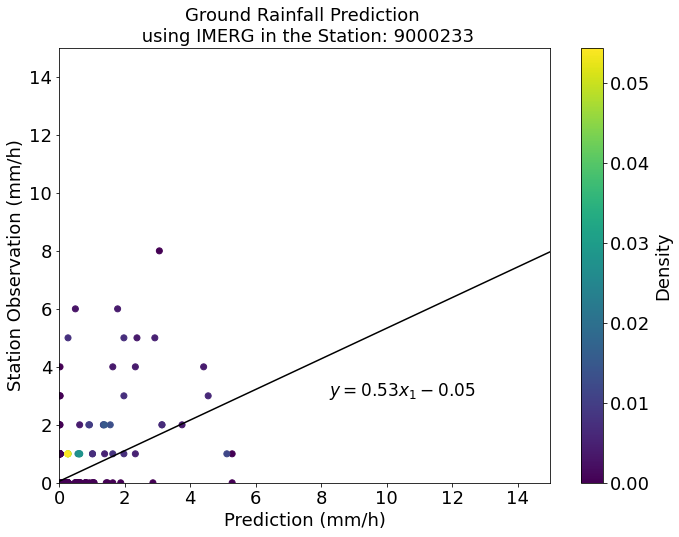

In [90]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [91]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.94176486, -2.36222125, -1.71063984, -6.38915567, -3.30614625,
       -1.79265406, -1.97081483, -3.48302976, -2.84273503, -1.78355918,
       -1.18860381, -2.75067109, -1.87860057, -1.45393199, -1.98186424,
       -2.0004017 , -4.77436354, -2.00105087, -7.27781458, -1.12188793])

In [92]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.393 1.537 1.308 2.528 1.818 1.339 1.404 1.866 1.686 1.335 1.09  1.659
 1.371 1.206 1.408 1.414 2.185 1.415 2.698 1.059]
RMSE 평균: 1.586
제거된 0의 비율: 94.681


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


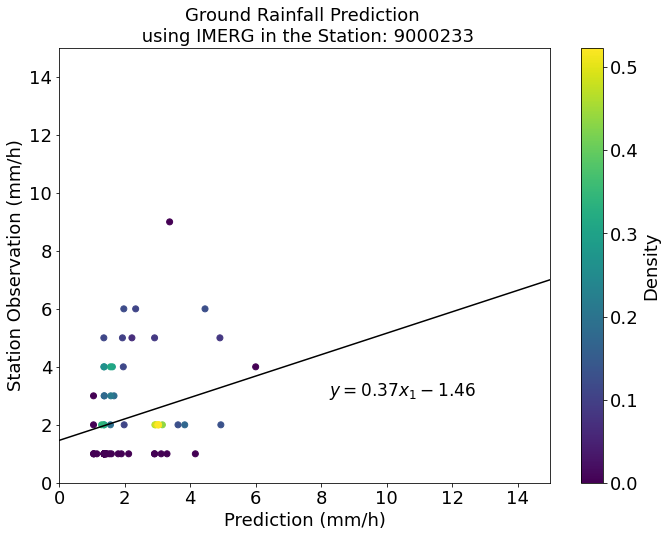

In [93]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [94]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 12. 9000234 Station Random Forest 분석

### Case-1 적용 RF

In [95]:
st_code = "9000234"
x_col = st_code + "_gpm"
y_col = st_code

In [96]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.51122839, -0.28869793, -1.12570861, -0.48831444, -0.16838919,
       -0.11402342, -0.48660715, -0.06501692, -0.09485213, -0.40401073,
       -0.26803674, -0.43653479, -0.29617774, -0.84672164, -0.99769617,
       -0.36988958, -0.17264992, -0.22993876, -0.26631805, -0.76201053])

In [97]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.715 0.537 1.061 0.699 0.41  0.338 0.698 0.255 0.308 0.636 0.518 0.661
 0.544 0.92  0.999 0.608 0.416 0.48  0.516 0.873]
RMSE 평균: 0.610


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


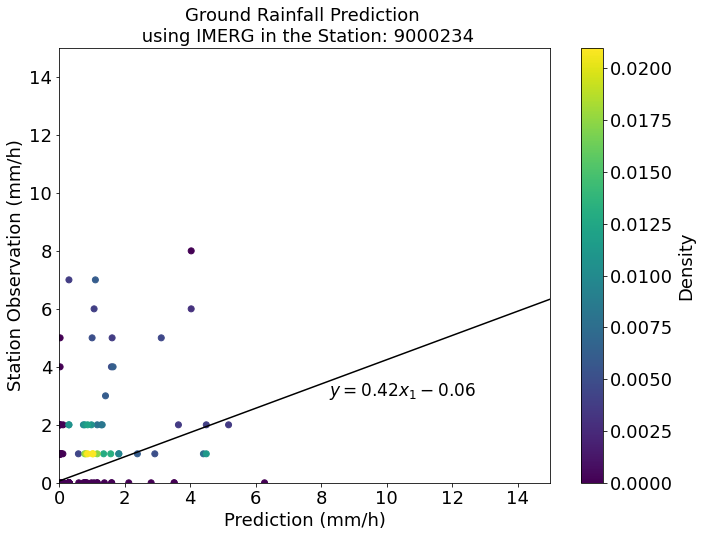

In [98]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [99]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -0.32860062,  -1.98713832,  -1.32020596,  -9.87953911,
        -8.94761578,  -7.01058078,  -1.7759361 ,  -6.04194702,
        -6.56989462,  -5.02046658,  -3.17425903,  -2.71617031,
        -7.76183962,  -7.79478163,  -8.9225869 ,  -2.34199936,
        -5.39211849,  -7.05203514,  -4.59995204, -11.88967382])

In [100]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [0.573 1.41  1.149 3.143 2.991 2.648 1.333 2.458 2.563 2.241 1.782 1.648
 2.786 2.792 2.987 1.53  2.322 2.656 2.145 3.448]
RMSE 평균: 2.230
제거된 0의 비율: 94.912


/tmp/ipykernel_31409/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_31409/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


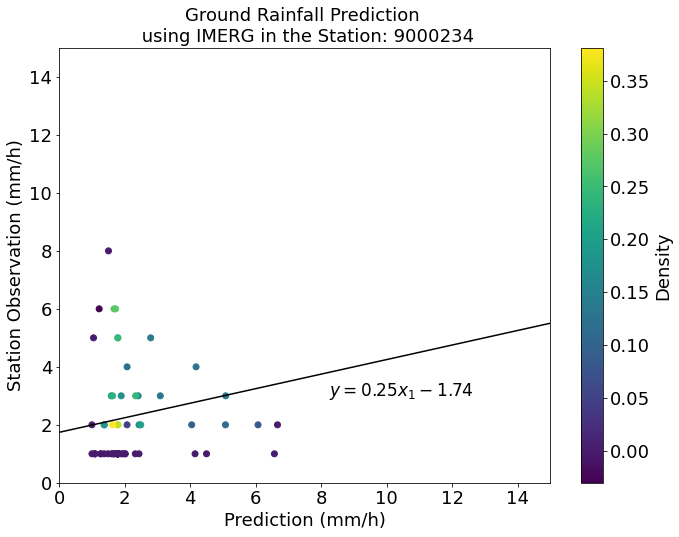

In [101]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [102]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

In [103]:
rmse_case1_all

[0.35151084814011135,
 0.4304414428331159,
 0.5109496670292545,
 0.38057978405035436,
 0.6310947606371909,
 0.554799461306456,
 0.5009503209288458,
 0.4259588863063907,
 0.6361439389395617,
 0.4403593870026154,
 0.512380537976049,
 0.609508143332395]

In [104]:
rmse_case2_all

[1.3782886922730015,
 1.5388712813326995,
 1.9245440244013186,
 1.1698837884992979,
 2.0374882473340246,
 1.8149963858462872,
 1.6591831200043383,
 1.4374611746632353,
 2.0506401757432577,
 1.631505078802207,
 1.585936737908685,
 2.2302102800315247]

In [105]:
zero_count_ratio

[95.6989247311828,
 95.43010752688173,
 95.48771121351767,
 95.71812596006144,
 94.83486943164363,
 94.93087557603687,
 94.98847926267281,
 95.04608294930875,
 94.79646697388633,
 95.142089093702,
 94.68125960061444,
 94.91167434715821]

In [107]:
import pandas as pd
 
data = {'CASE_1_RMSE': pd.Series(rmse_case1_all,
                       index=raw_hourly_df.columns[1:13].values),
        'CASE_2_RMSE': pd.Series(rmse_case2_all,
                       index=raw_hourly_df.columns[1:13].values),
        'Zero_Ratio(%)': pd.Series(zero_count_ratio,
                       index=raw_hourly_df.columns[1:13].values)}

df = pd.DataFrame(data)
 
# Print the data
df.to_csv("rf_3월.csv")
df

,CASE_1_RMSE,CASE_2_RMSE,Zero_Ratio(%)
4001430,0.351511,1.378289,95.698925
4001440,0.430441,1.538871,95.430108
4001450,0.510950,1.924544,95.487711
4003420,0.380580,1.169884,95.718126
4007450,0.631095,2.037488,94.834869
4007470,0.554799,1.814996,94.930876
4007472,0.500950,1.659183,94.988479
4007474,0.425959,1.437461,95.046083
4009460,0.636144,2.050640,94.796467
9000140,0.440359,1.631505,95.142089
